# Test and visualize the driving scenarios

In [ ]:
using POMDPs, StatsBase, POMDPToolbox, DeepRL, AutomotiveDrivingModels, AutoViz, Reel, Parameters, GridInterpolations

In [ ]:
rng = MersenneTwister(1);

In [ ]:
include("constants.jl")
include("utils/helpers.jl")
include("utils/occlusions.jl")

## Scenario 1: Single agent occluded crosswalk

Discrete environment, provides explicit transition and observation probability distributions. Support only one pedestrian

In [4]:
include("single_crosswalk/occluded_crosswalk_env.jl")
include("single_crosswalk/pomdp_types.jl")
include("single_crosswalk/spaces.jl")
include("single_crosswalk/transition.jl")
include("single_crosswalk/observation.jl")
include("single_crosswalk/belief.jl")
include("single_crosswalk/adm_helpers.jl")
include("single_crosswalk/render_helpers.jl")

In [5]:
pomdp = OCPOMDP()

OCPOMDP(CrosswalkEnv(Roadway, AutomotiveDrivingModels.Lane(LaneTag(2, 1), AutomotiveDrivingModels.CurvePt[CurvePt({25.000, -10.000, 1.571}, 0.000, 0.000, NaN), CurvePt({25.000, 10.000, 1.571}, 20.000, 0.000, NaN)], 6.0, AutomotiveDrivingModels.SpeedLimit(-Inf, Inf), AutomotiveDrivingModels.LaneBoundary(:unknown, :unknown), AutomotiveDrivingModels.LaneBoundary(:unknown, :unknown), AutomotiveDrivingModels.LaneConnection[], AutomotiveDrivingModels.LaneConnection[]), AutomotiveDrivingModels.ConvexPolygon[ConvexPolygon: len 4 (max 4 pts)
	VecE2(15.000, -1.500)
	VecE2(15.000, -4.500)
	VecE2(21.500, -4.500)
	VecE2(21.500, -1.500)
], EnvParams(2, 50.0, 3.0, 20.0, 6.0, 5.0, 37.0, 8.0, 0.5, 2.0, 10.0)), VehicleDef(CAR, 4.000, 1.800), VehicleDef(PEDESTRIAN, 1.000, 1.000), 2.0, 1.0, 1.0, 5.0, -5.0, 37.0, 5.0, 0.5, 0.3, 0.3, false, 1.0, 1.0, 1.0, -1.0, 0.0, 1.0, 0.95)

In [6]:
policy = solve(RandomSolver(rng), pomdp)
up = updater(policy);

**Simulate**

In [7]:
hr = HistoryRecorder(rng=rng)
hist = simulate(hr, pomdp, policy, up);

**Rendering**

In [8]:
duration, fps, render_hist = animate_hist(pomdp, hist)
film = roll(render_hist, fps = fps, duration = duration)

Reel.Frames{MIME{Symbol("image/png")}}("C:\\Users\\Maxime\\AppData\\Local\\Temp\\jl_F452.tmp", 0x0000000000000040, 2.0, nothing)

## Scenario 2: Multi-agent Crosswalk 

Generative model for the occluded crosswalk scenario, support multiple pedestrians, continuous space

In [4]:
include("multi_crosswalk/occluded_crosswalk_env.jl")
include("multi_crosswalk/pomdp_types.jl")
include("multi_crosswalk/constant_pedestrian.jl")
include("multi_crosswalk/generative_model.jl")
include("multi_crosswalk/render_helpers.jl")

In [17]:
pomdp = OCPOMDP();

In [18]:
policy = solve(RandomSolver(rng), pomdp)
up = updater(policy);

In [19]:
hr = HistoryRecorder(rng=rng, max_steps=100)
hist = simulate(hr, pomdp, policy, up);

In [20]:
duration, fps, render_hist = animate_hist(pomdp, hist)
film = roll(render_hist, fps = fps, duration = duration)

Reel.Frames{MIME{Symbol("image/png")}}("C:\\Users\\Maxime\\AppData\\Local\\Temp\\jl_CC74.tmp", 0x0000000000000064, 2.0, nothing)

## Scenario 3 : Single agent intersection

Explicit formulation with transition and observation probability distribution. Only support one vehicle

In [4]:
include("single_intersection/occluded_intersection_env.jl")
include("single_intersection/pomdp_types.jl")
include("single_intersection/spaces.jl")
include("single_intersection/transition.jl")
include("single_intersection/observation.jl")
include("single_intersection/belief.jl")
include("single_intersection/render_helpers.jl")

animate_hist (generic function with 1 method)

In [5]:
pomdp = OIPOMDP();

In [6]:
policy = solve(RandomSolver(rng), pomdp)
up = updater(policy);

In [7]:
hr = HistoryRecorder(rng=rng, max_steps=100)
hist = simulate(hr, pomdp, policy, up);

In [8]:
duration, fps, render_hist = animate_hist(pomdp, hist)
film = roll(render_hist, fps = fps, duration = duration)

Reel.Frames{MIME{Symbol("image/png")}}("C:\\Users\\Maxime\\AppData\\Local\\Temp\\jl_56E.tmp", 0x0000000000000014, 2.0, nothing)

## Scenario 3: Multi-agent Intersection

Generative model for the occluded crosswalk scenario, support multiple pedestrians, continuous space

In [4]:
include("multi_intersection/occluded_intersection_env.jl")
include("multi_intersection/pomdp_types.jl")
include("multi_intersection/lane_keeper_idm.jl")
include("multi_intersection/generative_model.jl")
include("multi_intersection/render_helpers.jl")

animate_hist (generic function with 1 method)

AutomotiveDrivingModels.

In [5]:
pomdp = OIPOMDP();

IntelligentDriverModel) in module AutomotiveDrivingModels at C:\Users\Maxime\.julia\v0.6\AutomotiveDrivingModels\src\1d\drivers\intelligent_driver_models.jl:18 overwritten in module Main at C:\Users\Maxime\OneDrive - Leland Stanford Junior University\Research\admscenarios\multi_intersection\lane_keeper_idm.jl:37.


In [6]:
policy = solve(RandomSolver(rng), pomdp)
up = updater(policy);

In [7]:
hr = HistoryRecorder(rng=rng, max_steps=100)
hist = simulate(hr, pomdp, policy, up);

In [8]:
duration, fps, render_hist = animate_hist(pomdp, hist)
film = roll(render_hist, fps = fps, duration = duration)

Reel.Frames{MIME{Symbol("image/png")}}("C:\\Users\\Maxime\\AppData\\Local\\Temp\\jl_9356.tmp", 0x0000000000000013, 2.0, nothing)

In [9]:
convert_o(Vector{Float64}, hist.observation_hist[end], pomdp)


44-element Array{Float64,1}:
  0.235081 
 -0.0385113
  1.31246  
  0.0      
  0.466667 
 -0.166667 
  0.5      
  0.0      
  0.466667 
 -0.166667 
  0.5      
  0.0      
  0.466667 
  ⋮        
  0.466667 
 -0.166667 
  0.5      
  0.0      
  0.466667 
 -0.166667 
  0.5      
  0.0      
  0.466667 
 -0.166667 
  0.5      
  0.0      

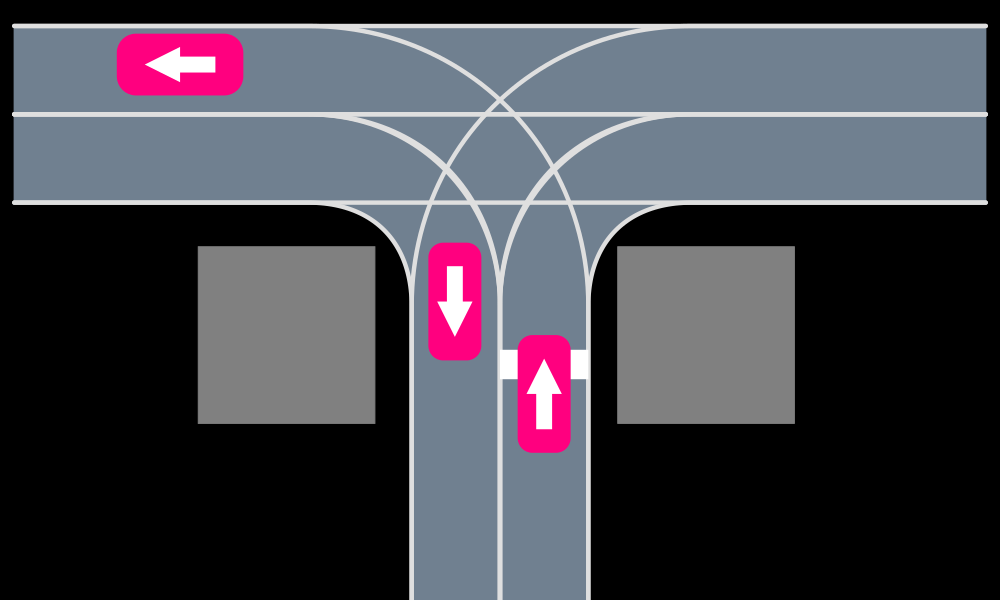

In [14]:
s = obs_to_scene(pomdp, hist.observation_hist[2])
AutoViz.render(s, pomdp.env, cam=FitToContentCamera(0.))




In [15]:
s = rand(hist.state_hist)
for veh in s 
    println(veh)
end  
    
    

Vehicle(1, VehicleState(VecSE2({8.000, -8.750}, 1.571), Frenet(RoadIndex({1, 0.625000}, {6, 1}), 6.250, 0.000, 0.000), 1.000), VehicleDef(CAR, 4.000, 1.800))
Vehicle(2, VehicleState(VecSE2({5.320, -2.702}, -1.851), Frenet(RoadIndex({43, 0.081697}, {3, 1}), 20.275, 0.000, 0.000), 5.101), VehicleDef(CAR, 4.000, 1.800))
Vehicle(4, VehicleState(VecSE2({-0.625, 3.000}, 3.142), Frenet(RoadIndex({4, 0.062500}, {2, 1}), 23.625, 0.000, 0.000), 8.000), VehicleDef(CAR, 4.000, 1.800))
Vehicle(5, VehicleState(VecSE2({21.125, 3.000}, 3.142), Frenet(RoadIndex({1, 0.187500}, {3, 1}), 1.875, 0.000, 0.000), 1.500), VehicleDef(CAR, 4.000, 1.800))


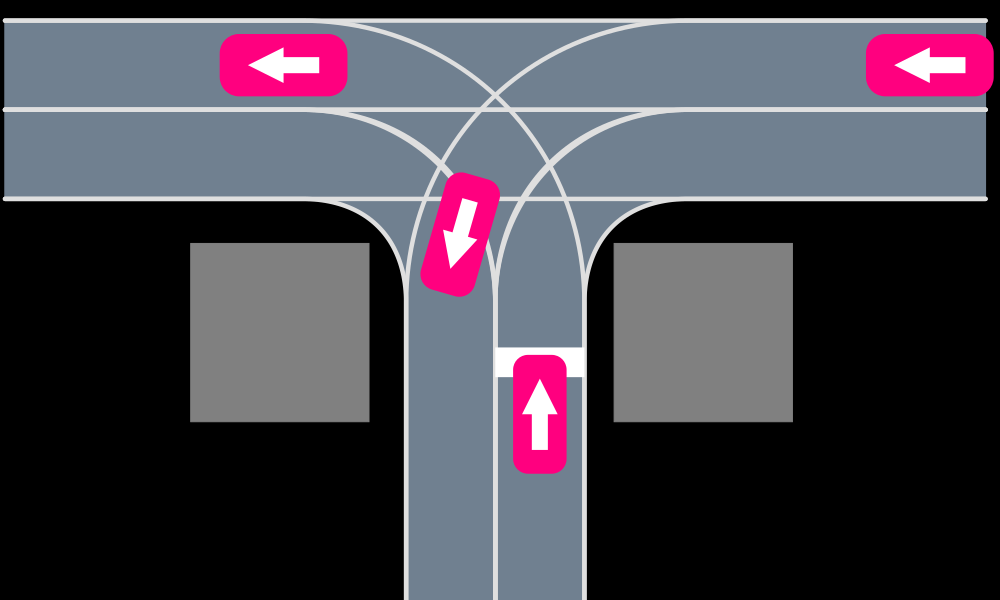

In [16]:
AutoViz.render(s, pomdp.env, cam=FitToContentCamera(0.))

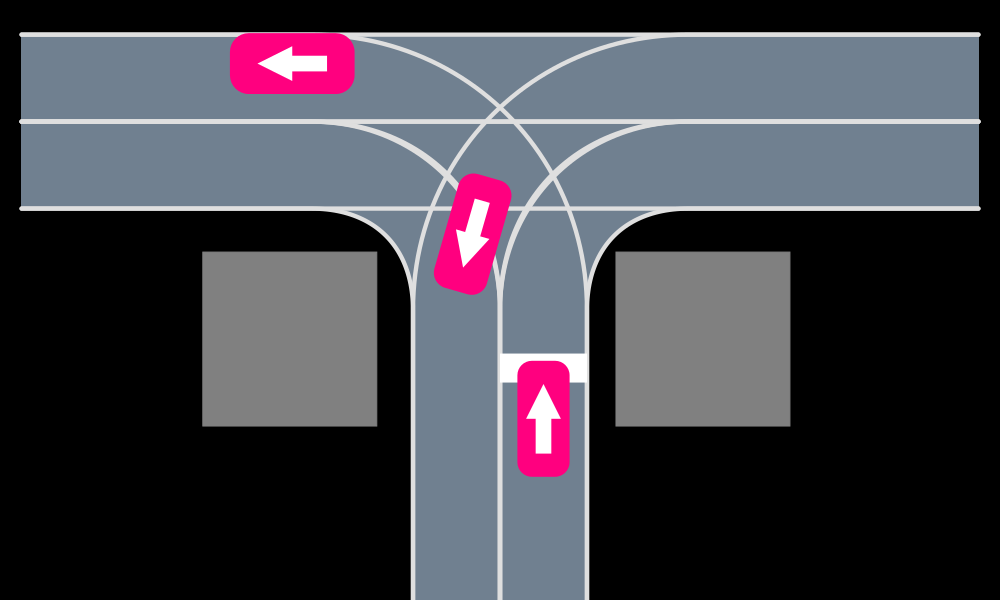

In [17]:
o = generate_o(pomdp, s, rng)
s_ = obs_to_scene(pomdp, o)
AutoViz.render(s_, pomdp.env, cam=FitToContentCamera(0.0))

## Scenario 4 - Multi Lane intersection

In [1]:
using POMDPs, StatsBase, POMDPToolbox, DeepRL, AutomotiveDrivingModels, AutoUrban, AutoViz, Reel, Parameters, GridInterpolations

In [2]:
rng = MersenneTwister(0)

Any...)

MersenneTwister(UInt32[0x00000000], Base.dSFMT.DSFMT_state(Int32[748398797, 1073523691, -1738140313, 1073664641, -1492392947, 1073490074, -1625281839, 1073254801, 1875112882, 1073717145  …  943540191, 1073626624, 1091647724, 1073372234, -1273625233, -823628301, 835224507, 991807863, 382, 0]), [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 382)

In [3]:
include("constants.jl")
include("utils/helpers.jl")
include("utils/occlusions.jl")
include("multi_lane_T_intersection/multi_lane_T_env.jl")

 in module Base at util.jl:532 overwritten in module Logging at C:\Users\Maxime\.julia\v0.6\Logging\src\Logging.jl:115.

IntersectionEnv

 overwritten in module Logging at C:\Users\Maxime\.julia\v0.6\Logging\src\Logging.jl:115

In [4]:
# additional method to render the crosswalk environment with obstacles
function AutoViz.render!(rendermodel::RenderModel, env::IntersectionEnv)
    render!(rendermodel, env.roadway)

    obs = env.obstacles[1]
    for obs in env.obstacles
        pts = Array{Float64}(2, obs.npts)
        for (i, pt) in enumerate(obs.pts)
            pts[1,i] = pt.x
            pts[2,i] = pt.y
        end

        add_instruction!(rendermodel, render_fill_region, (pts, colorant"gray"))
    end

    stop_line = get_posG(Frenet(env.lane_map["ego_left"], env.params.stop_line), env.roadway)
    x_pos, y_pos = stop_line.x, stop_line.y
    stop_pts = zeros(2,2)
    stop_pts[1,:] =  [(x_pos - env.params.lane_width/2) , (x_pos + env.params.lane_width/2)]
    stop_pts[2,:] =  [y_pos, y_pos]
    add_instruction!(rendermodel, render_line, (stop_pts, colorant"white", 1.0, Cairo.CAIRO_LINE_CAP_BUTT))
    return rendermodel
end

.

In [5]:
env = IntersectionEnv(gen_T_roadway(TInterParams()), )

 in module AutoUrban at C:\Users\Maxime\.julia\v0.6\AutoUrban\src\simulation\actions.jl:10.


LoadError: [91mMethodError: Cannot `convert` an object of type AutomotiveDrivingModels.Roadway to an object of type IntersectionEnv
This may have arisen from a call to the constructor IntersectionEnv(...),
since type constructors fall back to convert methods.[39m

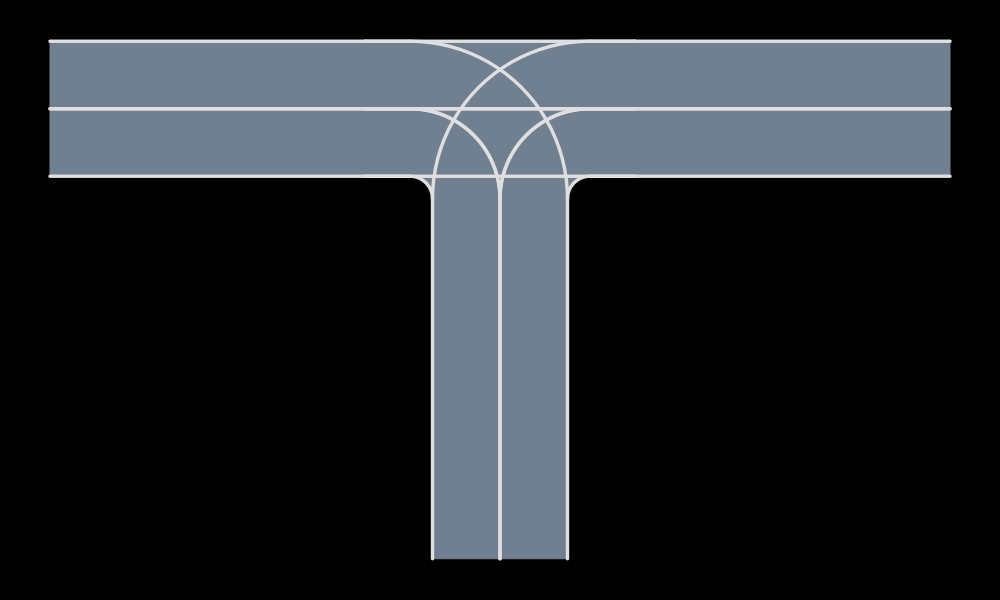

In [9]:
roadway = Roadway();

x_min = -20.0
x_max = +20.0
y_min = -20.0
inter_x = 0.
inter_y = 0.
inter_width = 6.0
inter_height = 1.0
lane_width = 3.0
nlanes_main = 1
nlanes = 1



seg1 = VecSE2(x_max, inter_y+nlanes_main*lane_width - lane_width/2, pi)
length1 = x_max - inter_x - inter_width
add_line!(seg1, nlanes_main, length1, roadway)

seg2 = VecSE2(inter_x - inter_width, inter_y+nlanes_main*lane_width - lane_width/2, pi)
length2 =  inter_x - inter_width - x_min
add_line!(seg2, nlanes_main, length2, roadway)

seg3 = VecSE2(x_min, inter_y-nlanes_main*lane_width + lane_width/2, 0.0)
length3 = inter_x - x_min - inter_width  
add_line!(seg3, nlanes_main, length3, roadway)


seg4 = VecSE2(inter_x + inter_width, inter_y-nlanes_main*lane_width + lane_width/2, 0.0)
length4 = x_max - inter_x - inter_width
add_line!(seg4, nlanes_main, length4, roadway)

seg5 = VecSE2(inter_x-nlanes*lane_width + lane_width/2, inter_y - nlanes_main*lane_width - inter_height, -pi/2)
length5 = inter_y - nlanes_main*lane_width - y_min - inter_height
add_line!(seg5, nlanes, length5, roadway)

seg6 = VecSE2(inter_x+nlanes*lane_width - lane_width/2, y_min, pi/2)
length6 = inter_y - nlanes_main*lane_width - y_min - inter_height
add_line!(seg6, nlanes, length6, roadway)

connections = [Connection(1,2), Connection(3,4)]
for i=1:nlanes_main
    push!(connections, Connection(1, 5, 0, [(i, 1)]))
    push!(connections, Connection(3, 5, 0, [(i, 1)]))
    push!(connections, Connection(6, 2, 0, [(1,i)]))
    push!(connections, Connection(6, 4, 0, [(1,i)]))
end

add_junction!(Junction(connections), roadway)
#todo programmatic way
# junction = Junction([
#                     Connection(1,2), 
#                     Connection(3,4),
#                     Connection(1,5,0,[(1,1)]), # left from right
#                     Connection(1,5,0,[(2,1)]),
#                     Connection(3,5,0,[(1,1)]), # right from left
#                     Connection(3,5,0,[(2,1)]),
#                     Connection(6,2,0,[(1,1)]), # ego left
#                     Connection(6,2,0,[(1,2)]),
#                     Connection(6,4,0,[(1,1)]), # ego right
#                     Connection(6,4,0,[(1,2)]),
#                     ])

# add_junction!(junction, roadway)

roadway


In [ ]:
using Interact

scene = Scene()

type LaneOverlay <: SceneOverlay
    lane::Lane
    color::Colorant
end
function AutoViz.render!(rendermodel::RenderModel, overlay::LaneOverlay, scene::Scene, roadway::Roadway)
    render!(rendermodel, overlay.lane, roadway, color_asphalt=overlay.color)
    return rendermodel
end

@manipulate for i in 1 : length(roadway.segments)
    render(scene, roadway, [LaneOverlay(roadway[LaneTag(i,1)], RGBA(0.0,0.0,1.0,0.5))], cam=cam)
end

In [74]:
?Connection


search: Connection LaneConnection add_connection! ConvergenceException connect



No documentation found.

**Summary:**

```
mutable struct AutoUrban.Connection <: Any
```

**Fields:**

```
source          :: Int64
dest            :: Int64
path            :: Int64
laneConnections :: Array{Tuple{Int64,Int64},N} where N
```


In [75]:
?add_connection!

search: add_connection!



No documentation found.

`AutoUrban.add_connection!` is a `Function`.

```
# 1 method for generic function "add_connection!":
add_connection!(connection::AutoUrban.Connection, roadway::AutomotiveDrivingModels.Roadway; boundary_left, boundary_right, boundary_middle) in AutoUrban at C:\Users\Maxime\.julia\v0.6\AutoUrban\src\roadway\roadway_generation.jl:516
```


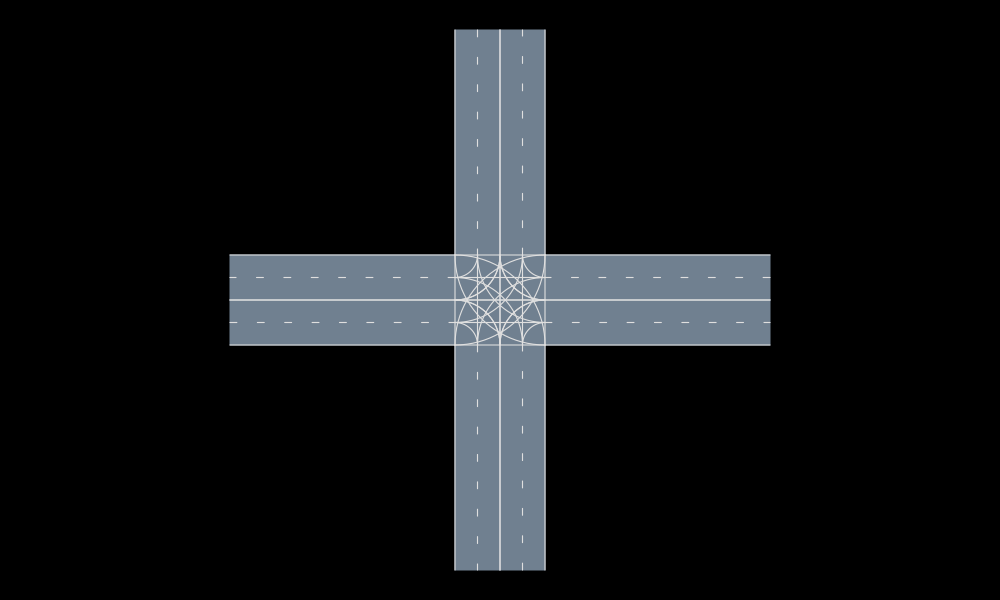

In [82]:
r,j = gen_intersection(roadlength = 30.0)
r

In [ ]:
gen_intersection(;nlanes::Int=2,roadlength::Float64=5.0,
    lane_width::Float64=DEFAULT_LANE_WIDTH, # [m]
    lane_widths::Vector{Float64} = fill(lane_width, nlanes),
    crosswidth::Float64=nlanes*lane_width,
    origin::VecSE2 = VecSE2(0.0,0.0,0.0),
    #connections::Array{Tuple{Int,Int}}=[(1,6),(3,8),(5,2),(7,4),(1,2),(3,4),(5,6),(7,8),(1,4),(3,6),(5,8),(7,2)],
    junction::Junction=Junction([Connection(1,6),Connection(3,8),Connection(5,2),Connection(7,4),Connection(1,2),Connection(3,4),Connection(5,6),Connection(7,8),Connection(1,4),Connection(3,6),Connection(5,8),Connection(7,2)]),
    boundary_leftmost::LaneBoundary=LaneBoundary(:solid, :white),
    boundary_rightmost::LaneBoundary=LaneBoundary(:solid, :white),
    boundary_middle::LaneBoundary=LaneBoundary(:broken, :white)
    )

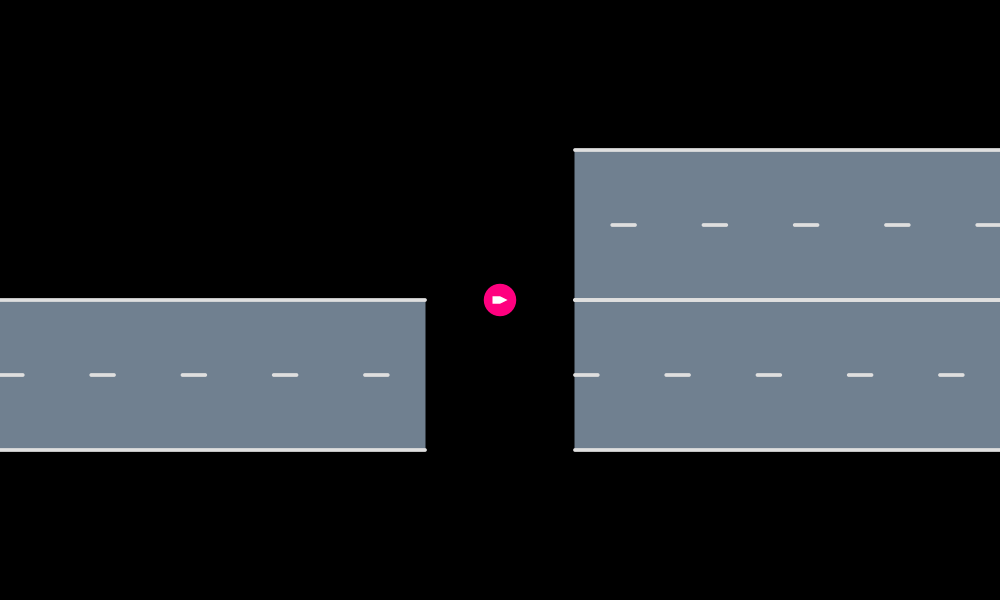

In [47]:
veh = Vehicle(VehicleState(VecSE2(0.,0.),roadway, 0.), VehicleDef(AgentClass.CAR,1,1),0)
s = Scene()
push!(s, veh)
AutoViz.render(s, roadway, cam=FitToContentCamera(0.))


In [17]:
function get_true_roadway()
    roadway = Roadway()
    nlanes = 3
    seg1 = VecSE2(-10.0,0.0,0.0)
    length1 = 10.
    add_line!(seg1,nlanes,length1,roadway)

    seg2 = VecSE2(5.0,-5.0,-pi/2)
    length2 = 10.
    add_line!(seg2,nlanes,length2,roadway)

    seg3 = VecSE2(0.0, 3.0, pi)
    length3 = 10.
    add_line!(seg3, nlanes, length3, roadway)

    seg4 = VecSE2(23.0, 3.0, pi)
    length4 = 10.
    add_line!(seg4, nlanes, length4, roadway)

    seg5 = VecSE2(13.0, 0.0, 0.0)
    length5 = 10.
    add_line!(seg5, nlanes, length5, roadway)

    seg6 = VecSE2(8.0, -15, pi/2)
    length6 = 10.
    add_line!(seg6, nlanes, length6, roadway)

    junction = Junction([Connection(1,2), Connection(1,5), Connection(6,3), Connection(4,3), Connection(6,5), Connection(4,2)])  #, Connection(3,4), Connection(1,5), Connection(6,5), Connection(4,2)])

    add_junction!(junction, roadway)

    roadway
end

get_true_roadway (generic function with 1 method)

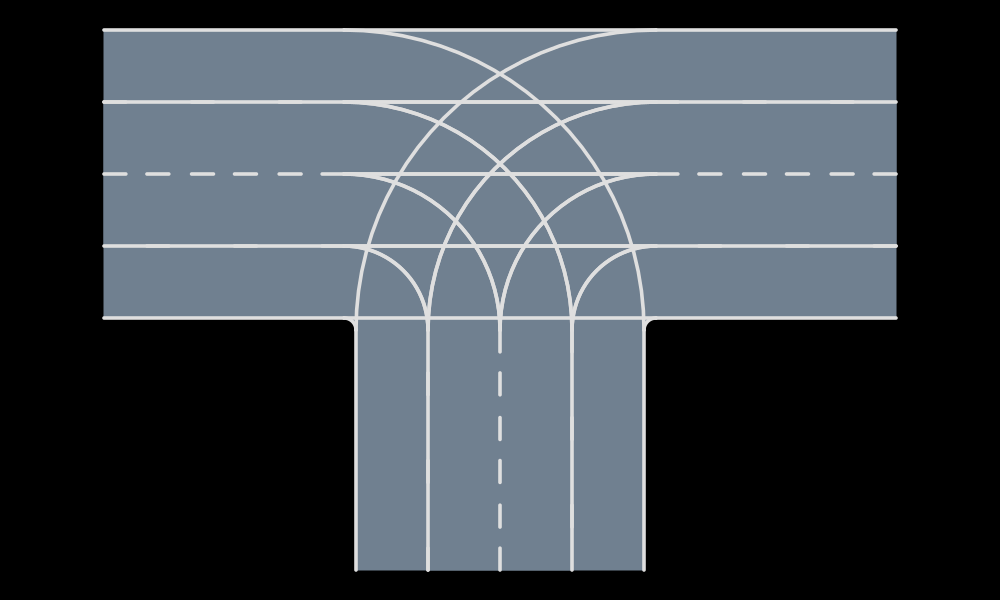

In [18]:
roadway = get_true_roadway();